## <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Demo 2: Raster Analysis

### <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Learning objectives

- <span style="font-size:1.3em"> Use simple map algebraic expressions </span>
- <span style="font-size:1.3em"> Use functions and complex parameters </span>
- <span style="font-size:1.3em"> Apply environment settings and use complex expressions </span>

<span style="font-size:1.2em"> _**Bobcat habitat suitability model example**_ </span>

<span style="font-size:1.2em"> A suitability model identifies areas to set aside for different variables of interest, such as parks, areas for new development, etc given a set of criteria. In this simple example, our goal is to identify areas that would best accomodate bobcat habitat given the following criteria: </span>

- <span style="font-size:1.2em"> Slope – they prefer steeper over flatter slopes for safety </span>
- <span style="font-size:1.2em"> Land use types – they prefer certain land use types (such as deciduous and conifer forests) more than others (such as commercial and residential) </span>
- <span style="font-size:1.2em"> Distance to streams – locations closer to streams are more preferred </span>

<img src=>

In [27]:
import arcpy
from arcpy.sa import *
from arcpy.ia import *

In [28]:
arcpy.env.workspace = r'C:\DevSummit\PythonRaster\Data\Demo2\Data.gdb'

### Create each criteria

<span style="font-size:1.2em"> **Derive Slope from elevation applying Spatial Analyst tools and simple expressions** </span>

In [3]:
## Read the elevation raster created in Demo 1

elev = Raster(r'Elevation_sa')

<span style="font-size:1.2em"> The `arcpy.env.addOutputsToMap` allows you to control whether intermediate outputs you create during your explanatory analysis will be added to the Contents. Set it back to `True` to add the output to the map. </span>

In [4]:
arcpy.env.addOutputsToMap = False

In [5]:
elev_m = elev * 0.3048
slope = SurfaceParameters(elev_m, "SLOPE", "", "", "", "", "")

In [6]:
slope = SurfaceParameters(elev*0.3048, "SLOPE", "", "", "", "", "")  # alternative way to chain operations together

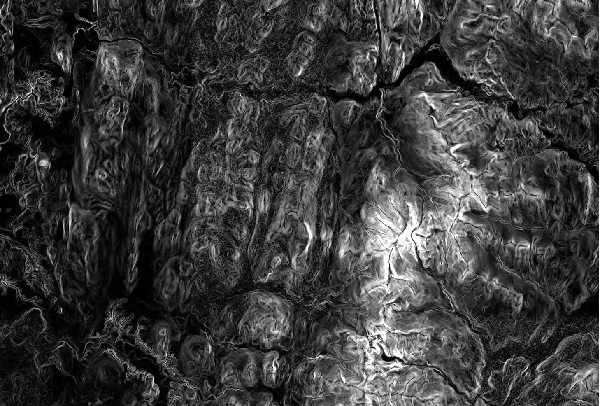

In [7]:
slope

<span style="font-size:1.2em"> **Transform the slope criterion to scores that reflect preference for habitat areas** </span>

<span style="font-size:1.2em"> We will remap slope degrees to the following suitability scores. Note that the scores have been remapped from 1 to 10 which is the same range that will be used for other criteria.</span>

| <span style="font-size:1.2em">Start</span> | <span style="font-size:1.2em">End</span> | <span style="font-size:1.2em">Suitability Score</span> |
|-------|-----|-----|
| <span style="font-size:1.2em">0</span>     | <span style="font-size:1.2em">3</span>   | <span style="font-size:1.2em">1</span>   |
| <span style="font-size:1.2em">3</span>     | <span style="font-size:1.2em">10</span>  | <span style="font-size:1.2em">3</span>   |
| <span style="font-size:1.2em">10</span>    | <span style="font-size:1.2em">25</span>  | <span style="font-size:1.2em">6</span>   |
| <span style="font-size:1.2em">25</span>    | <span style="font-size:1.2em">90</span>  | <span style="font-size:1.2em">10</span>  |


<span style="font-size:1.2em"> `RemapRange` is an object useful to pass to the `Reclassify` tool the new values to which a range will be mapped. </span>

In [8]:
remap_table = RemapRange([[0,3,1], [3,10,3], [10,25,6], [25,90,10]])

In [9]:
slope_transformed = Reclassify(slope, "Value", remap_table) # Using the remap_table object that was created above

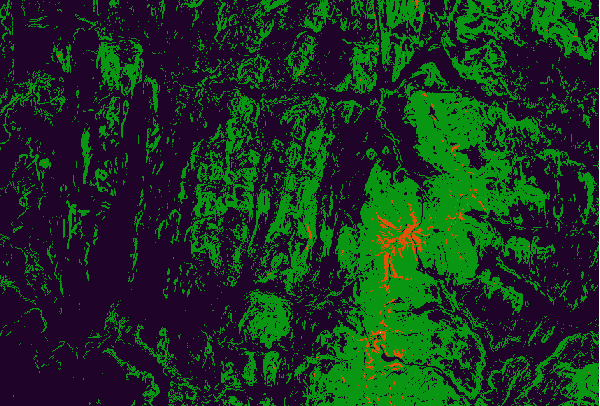

In [11]:
slope_transformed

<span style="font-size:1.2em"> **Reclassify landuse classes to new values that represent the preference for habitat** </span>

In [29]:
landuse = Raster('Landuse_sa')

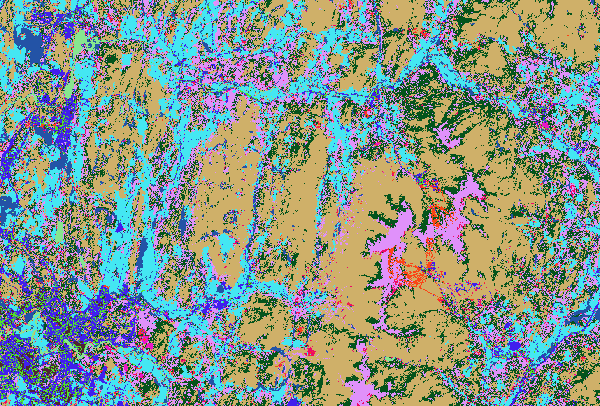

In [30]:
landuse

<span style="font-size:1.2em"> Remap landuse classes to suitability scores. Note that instead of a range, now we are mapping one value to a new value. </span>

| <span style="font-size:1.2em">Landuse class</span>| <span style="font-size:1.2em">Old Value</span> | <span style="font-size:1.2em">New Value</span> |
|------------------------------------|-----------|-----------|
| <span style="font-size:1.2em">Agriculture</span>                        | <span style="font-size:1.2em">4</span>         | <span style="font-size:1.2em">2</span>         |
| <span style="font-size:1.2em">Bare Land</span>                          | <span style="font-size:1.2em">11</span>        | <span style="font-size:1.2em">10</span>        |
| <span style="font-size:1.2em">Developed, High Intensity</span>          | <span style="font-size:1.2em">1</span>        | <span style="font-size:1.2em">1</span>         |
| <span style="font-size:1.2em">Developed, Low Intensity</span>           | <span style="font-size:1.2em">3</span>         | <span style="font-size:1.2em">1</span>         |
| <span style="font-size:1.2em">Developed, Medium Intensity</span>        | <span style="font-size:1.2em">2</span>         | <span style="font-size:1.2em">1</span>         |
| <span style="font-size:1.2em">Forest, Coniferous</span>                 | <span style="font-size:1.2em">7</span>         | <span style="font-size:1.2em">10</span>        |
| <span style="font-size:1.2em">Forest, Deciduous</span>                  | <span style="font-size:1.2em">6</span>         | <span style="font-size:1.2em">10</span>        |
| <span style="font-size:1.2em">Forest, Mixed Deciduous-Coniferous</span> | <span style="font-size:1.2em">8</span>         | <span style="font-size:1.2em">10</span>        |
| <span style="font-size:1.2em">Grassland</span>                          | <span style="font-size:1.2em">5</span>         | <span style="font-size:1.2em">8</span>         |
| <span style="font-size:1.2em">Scrub/Shrub</span>                        | <span style="font-size:1.2em">9</span>         | <span style="font-size:1.2em">6</span>         |
| <span style="font-size:1.2em">Water</span>                              | <span style="font-size:1.2em">12</span>        | <span style="font-size:1.2em">1</span>         |
| <span style="font-size:1.2em">Wetland</span>                            | <span style="font-size:1.2em">10</span>        | <span style="font-size:1.2em">2</span>         |

In [33]:
remap_table = RemapValue([[4,2], [11,10], [1,1], [3,1], [2,1], [7,10], 
                          [6,10] ,[8,10], [5,8], [9,6], [12,1], [10,2]])

In [34]:
landuse_transformed = Reclassify(landuse, "Value", remap_table)

<span style="font-size:1.2em"> **Obtain distance to streams** </span>

In [16]:
arcpy.Clip_analysis("Streams", "StudyArea", "C:\DevSummit\PythonRaster\Data\Demo2\streams_clip")

<Result 'C:\\DevSummit\\PythonRaster\\Data\\Demo2\\streams_clip.shp'>

In [17]:
dist_to_streams = DistanceAccumulation("C:\DevSummit\PythonRaster\Data\Demo2\streams_clip")

<span style="font-size:1.2em"> Alternative way that combines non-raster analysis tool with raster analysis tool in one single expression </span>

In [18]:
dist_to_streams = DistanceAccumulation(arcpy.Clip_analysis("Streams", "StudyArea", "#")) 

<span style="font-size:1.2em"> Previous criteria have been remapped using the `Reclassify` tool, for Distance to Streams, we will use a function to remap the values to a continuous range between 1 and 10.
To learn more about the different functions available, see [Transformation functions available for Rescale by Function (Spatial Analyst)](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/the-transformation-functions-available-for-rescale-by-function.htm).</span>

<span style="font-size:1.2em"> We are using TfMSSmall() because it rescales the input data assigning a higher preference to smaller values, which is exactly what we need: the smaller the distance to streams the better. 
</span>

In [19]:
dist_to_streams_transformed = RescaleByFunction(dist_to_streams, TfMSSmall(), 1, 10)

### Weight criteria relative to one another and combine

In [20]:
suitability_map = slope_transformed * 0.2 + \
                  landuse_transformed * 0.5 + \
                  dist_to_streams_transformed * 0.3

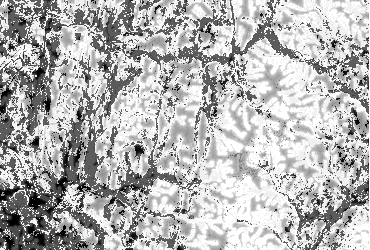

In [21]:
suitability_map

In [22]:
suitability_rendered = Render(suitability_map, colormap="Red-Yellow-Green (Continuous)")

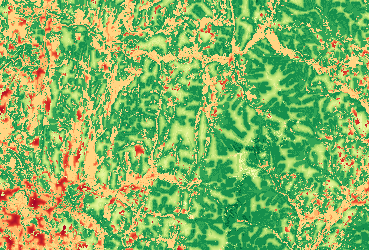

In [23]:
suitability_rendered

### Set analysis environment

In [22]:
arcpy.env.cellSize = 100

In [23]:
arcpy.env.outputCoordinateSystem = arcpy.SpatialReference(3857)  # Web_Mercator_Auxiliary_Sphere

### Combining statements into one complex expression

<span style="font-size:1.2em"> Running each statement individually is an appropriate approach during exploratory analysis. When the analysis steps are already determined, it is possible to combine all individual statements into a single complex expression that is optimized and returns the output of interest. </span>

In [24]:
slope_transformed = Reclassify(SurfaceParameters(elev*0.3048, "SLOPE", "", "", "", "", ""), 
                             "Value", 
                             RemapRange([[0,3,1], [3,10,3], [10,25,6], [25,90,10]]))


In [25]:
print("Input cell size is {} x {}".format(elev.meanCellHeight, 
                                           elev.meanCellWidth))

Input cell size is 30.0 x 30.0


In [26]:
print("Input map projection is {}".format(elev.spatialReference.PCSName))

Input map projection is NAD_1983_StatePlane_Vermont_FIPS_4400


In [27]:
print('Output cell size is {} x {}'.format(slope_transformed.meanCellHeight, 
                                           slope_transformed.meanCellWidth))

Output cell size is 100.0 x 100.0


In [28]:
print("Output map projection is {}".format(slope_transformed.spatialReference.PCSName))

Output map projection is WGS_1984_Web_Mercator_Auxiliary_Sphere
